In [1]:
import numpy as np
import matplotlib.pyplot as plt

# variance: derivation from estimated value
# bias: derivation from true value

unbiased estimator, bias = 0


how can we get a grip on variance ?

## 1. Bernoulli Neuron: Fisher information and estimator

Assume a Bernoulli neuron with arbitrary tuning curve $f(s)$, i.e.
$$p(r| f(s)) = f(s)^r(1- f(s))^{1-r}, \qquad r \in \{0; 1\}$$

*Note: $r$ is discrete and $s$ is continuous.*

**(a)** Compute the Fisher information $J_s$. *(2 points)*


$$
p(r|f(s)) = f(s)^r (1 - f(s))^{1 - r}
$$


$$
J_s = \mathbb{E} \left[ \left( \frac{\partial}{\partial s} \log p(r|f(s)) \right)^2 \right]
$$


$$
\log p(r|f(s)) = r \log f(s) + (1 - r) \log(1 - f(s))
$$

$$
\frac{\partial}{\partial s} \log p(r|f(s)) = \frac{r}{f(s)} f'(s) - \frac{1 - r}{1 - f(s)} f'(s)
$$

$$
= \left( \frac{r}{f(s)} - \frac{1 - r}{1 - f(s)} \right) f'(s)
$$


$$
\left( \frac{\partial}{\partial s} \log p(r|f(s)) \right)^2 = \left( \frac{r}{f(s)} - \frac{1 - r}{1 - f(s)} \right)^2 (f'(s))^2
$$


- For r = 1: probability f(s)
- For r = 0: probability 1 - f(s)


$$
J_s = \sum_{r=0}^1 p(r|f(s)) \left( \frac{r}{f(s)} - \frac{1 - r}{1 - f(s)} \right)^2 (f'(s))^2
$$


- For r = 1:

$$
p(1|f(s)) = f(s)
$$

$$
\left( \frac{1}{f(s)} - 0 \right)^2 = \frac{1}{f(s)^2}
$$
- For r = 0:

$$
p(0|f(s)) = 1 - f(s)
$$

$$
\left( 0 - \frac{1}{1 - f(s)} \right)^2 = \frac{1}{(1 - f(s))^2}
$$


$$
J_s = f(s) \frac{1}{f(s)^2} (f'(s))^2 + (1 - f(s)) \frac{1}{(1 - f(s))^2} (f'(s))^2
$$

$$
= \left( \frac{1}{f(s)} + \frac{1}{1 - f(s)} \right) (f'(s))^2
$$


$$
J_s = \frac{(f'(s))^2}{f(s)(1 - f(s))}
$$

**(b)** Assume $f(s) = \frac{1}{1+s^2}$. Plot the Fisher information on the interval $s\in[-5, 5]$. Additionally, plot the Fisher information for a Poisson neuron with the same tuning curve using the formula from the lecture. *(2 points)*

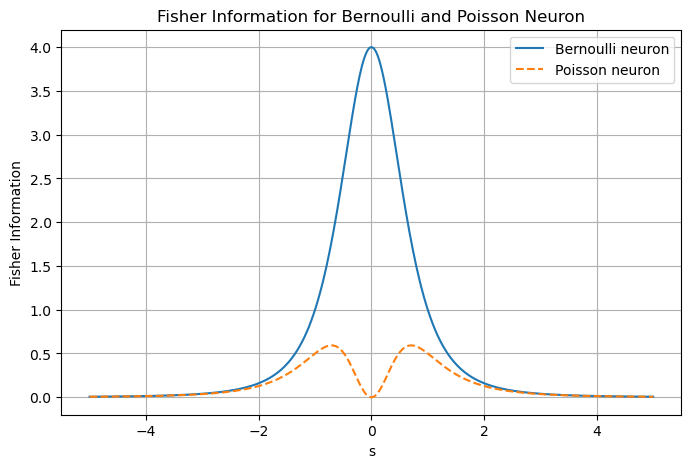

In [2]:
s = np.linspace(-5, 5, 500)
f = 1 / (1 + s**2)
df = -2 * s / (1 + s**2)**2

J_bernoulli = (df**2) / (f * (1 - f))
J_poisson = (df**2) / f

plt.figure(figsize=(8, 5))
plt.plot(s, J_bernoulli, label='Bernoulli neuron')
plt.plot(s, J_poisson, label='Poisson neuron', linestyle='--')
plt.xlabel('s')
plt.ylabel('Fisher Information')
plt.title('Fisher Information for Bernoulli and Poisson Neuron')
plt.legend()
plt.grid(True)
plt.show()

**(c)** Given an estimator
$\hat s(r) = \begin{cases} 1 & if\qquad r=0\\ 0 &if\qquad r=1\end{cases}$.\
Compute variance $\sigma^2(s)$, bias $b(s)$, and mean squared error $MS(s)$ of this estimator. Don't use the relationship $MS(s) = b^2(s) + \sigma^2(s)$, but instead compute them independently. *(2 points)*

*Confirm for yourself with an automatized tool like wolphramalpha that their relationship is correct.*

$$
\mathbb{E}[\hat{s}|s] = 0 \cdot (f(s))^0 \cdot (1 - f(s))^1 + 1 \cdot (f(s))^1 \cdot (1 - f(s))^0 = f(s)
$$

$$
\mathbb{E}[\hat{s}^2] = 1^2 \cdot f(s) = f(s)
$$
$$
\sigma^2(s) = \mathbb{E} \left[ \left( \mathbb{E}[\hat{s}|s] - s \right)^2 \right] 
= \mathbb{E}[\hat{s}|s]^2 - 2\, \mathbb{E}[\hat{s}|s]\, s + \mathbb{E}[\hat{s}^2] 
= \mathbb{E}[\hat{s}|s]^2 - \mathbb{E}[\hat{s}^2]
$$

$$
= f(s)^2 - f(s) = f(s) \left( f(s) - 1 \right)
$$


$$
b(s) = \mathbb{E}[\hat{s}|s] - s = f(s) - s
$$


$$
\text{MSE}(s) = \mathbb{E}_r \left[ (s - \hat{s}(r))^2 \mid s \right] 
= \mathbb{E}[\hat{s}|s]^2 - 2s\, \mathbb{E}[\hat{s}|s] + \mathbb{E}[\hat{s}^2]
$$

$$
= s^2 - 2s\, f(s) + f(s)
$$

$$
= s^2 + f(s) \cdot (1 - 2s)
$$

**(d)** Assume $s\sim\mathcal{U}([0,1])$. Compute the ideal observer $\hat s_{MS}(r)$. *(2 points)*

*Hint: Compute $p(r=0)$ and $p(r=1)$ with law of total probability. Then use Bayes' theorem to compute $p(s|r)$. Useful integrals:*
\begin{split}
\int \frac1{1+s^2} ds &= \tan^{-1}(s) + c, \qquad c\in\mathbb{R}\\
\int \frac{s}{1+s^2} ds &= \frac12 \ln(1+s^2) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^2}{1+s^2} ds &= s - \tan^{-1}(s) + c, \qquad c\in\mathbb{R} \\
\int \frac{s^3}{1+s^2} ds &= \frac{s^2 - \ln(1+s^2)}{2} + c, \qquad c\in\mathbb{R}
\end{split}

#### Calculating p(r)

Bernulli distributed neuron response:
$$
p(r|s) = f(s)^r (1 - f(s))^{1 - r}, \qquad r \in \{0, 1\}
$$

Insert the tuning curve $f(s) = \frac{1}{1 + s^2}:$

$$
p(r|s) = \left( \frac{1}{1 + s^2} \right)^r \left( 1 - \frac{1}{1 + s^2} \right)^{1 - r}
$$

Simplify $ 1 - \frac{1}{1 + s^2} = \frac{s^2}{1 + s^2}:$

$$
p(r|s) = \left( \frac{1}{1 + s^2} \right)^r \left( \frac{s^2}{1 + s^2} \right)^{1 - r}
$$

So,

$$
p(r|s) = 
\begin{cases}
\frac{s^2}{1 + s^2} & \text{if } r = 0 \\
\frac{1}{1 + s^2} & \text{if } r = 1
\end{cases}
$$

$$
p(r) = \int_0^1 p(r|s) \, ds
$$


So,

$$
p(r=1) = \int_0^1 \frac{1}{1+s^2} ds = \left[ \arctan(s) \right]_0^1 = \arctan(1) - \arctan(0) = \frac{\pi}{4}
$$

$$
p(r=0) = \int_0^1 \frac{s^2}{1+s^2} ds = \int_0^1 1 - \frac{1}{1+s^2} ds = \left[ s - \arctan(s) \right]_0^1 = 1 - \frac{\pi}{4}
$$

#### Using Bayes' theorem to compute $p(s|r)$

Bayes' theorem:
$$
p(s|r) = \frac{p(r|s) p(s)}{p(r)}
$$

Given $s \sim \mathcal{U}([0,1])$, so $p(s) = 1$ for $s \in [0,1]$.

So,
- For $r=1$:
    $$
    p(s|r=1) = \frac{p(r=1|s) p(s)}{p(r=1)} = \frac{\frac{1}{1+s^2}}{\frac{\pi}{4}} = \frac{4}{\pi} \cdot \frac{1}{1+s^2}
    $$
- For $r=0$:
    $$
    p(s|r=0) = \frac{p(r=0|s) p(s)}{p(r=0)} = \frac{\frac{s^2}{1+s^2}}{1-\frac{\pi}{4}} = \frac{1}{1-\frac{\pi}{4}} \cdot \frac{s^2}{1+s^2}
    $$

#### Computing ideal observer $\hat{s}_{MS}(r)$

- For $r=1$:
    $$
    \hat{s}_{MS}(r=1) = \int_0^1 s\, p(s|r=1)\, ds = \frac{4}{\pi} \int_0^1 \frac{s}{1+s^2} ds
    $$
    Using the provided integral:
    $$
    \int \frac{s}{1+s^2} ds = \frac{1}{2} \ln(1+s^2)
    $$
    So,
    $$
    \int_0^1 \frac{s}{1+s^2} ds = \frac{1}{2} \ln(2)
    $$
    Therefore,
    $$
    \hat{s}_{MS}(r=1) = \frac{4}{\pi} \cdot \frac{1}{2} \ln(2) = \frac{2 \ln 2}{\pi}
    $$

- For $r=0$:
    $$
    \hat{s}_{MS}(r=0) = \int_0^1 s\, p(s|r=0)\, ds = \frac{1}{1-\frac{\pi}{4}} \int_0^1 \frac{s^3}{1+s^2} ds
    $$
    Using the provided integral:
    $$
    \int \frac{s^3}{1+s^2} ds = \frac{s^2 - \ln(1+s^2)}{2}
    $$
    So,
    $$
    \int_0^1 \frac{s^3}{1+s^2} ds = \frac{1 - \ln(2)}{2}
    $$
    Therefore,
    $$
    \hat{s}_{MS}(r=0) = \frac{1}{1-\frac{\pi}{4}} \cdot \frac{1 - \ln(2)}{2}
    $$

**Summary:**

- $\boxed{\hat{s}_{MS}(r=1) = \dfrac{2 \ln 2}{\pi}}$
- $\boxed{\hat{s}_{MS}(r=0) = \dfrac{1 - \ln 2}{2 \left(1 - \frac{\pi}{4}\right)}}$


**(e*)** Contextualize the previous exercises with Cramer-Rao bound. *(2 points)*


General Contextualization: How usefull is this result ? What is done here ? Summarize the results in sentencese, make connections to the real world (i.e. Neurons) clear.


Contextualize the fisher information plot:

I.e. for which stimuli will the estimator be good ? Are a lot of the possible stimuli well estimated ?

Contextualize given estimator and ideal estimator using the Cramer Rao bound:

How efficient is the estimnator we got ? How much better is the ideal estimator than the simpler estimator before ?

Maybe also use some additional techniques from slide 11 (which is also marked with a star*) to answer this.

## 2: Minimum Discrimination Error (MDE)

Given two stimuli $s_1$ and $s_2$ with probabilities $\lambda$ and $1-\lambda$, the response function is given as

$$p(r|s) = \begin{cases}
\tfrac12 &for & s=0 &and &r\in[-1,1]\\
\tfrac1{2x} &for &s=1 &and &r\in[-x, x]\\
0 &else
\end{cases}$$

**(a)** Draw diagrams for each possible case and highlight the MDE. Additionally, write down the decision for the Maximal a posteriori estimator $\hat{s}_{MAP}(r)$. *(2 points)*\
*Hint: Differentiate the cases by $\lambda$ and $x$. (there are 4 possibilities)*

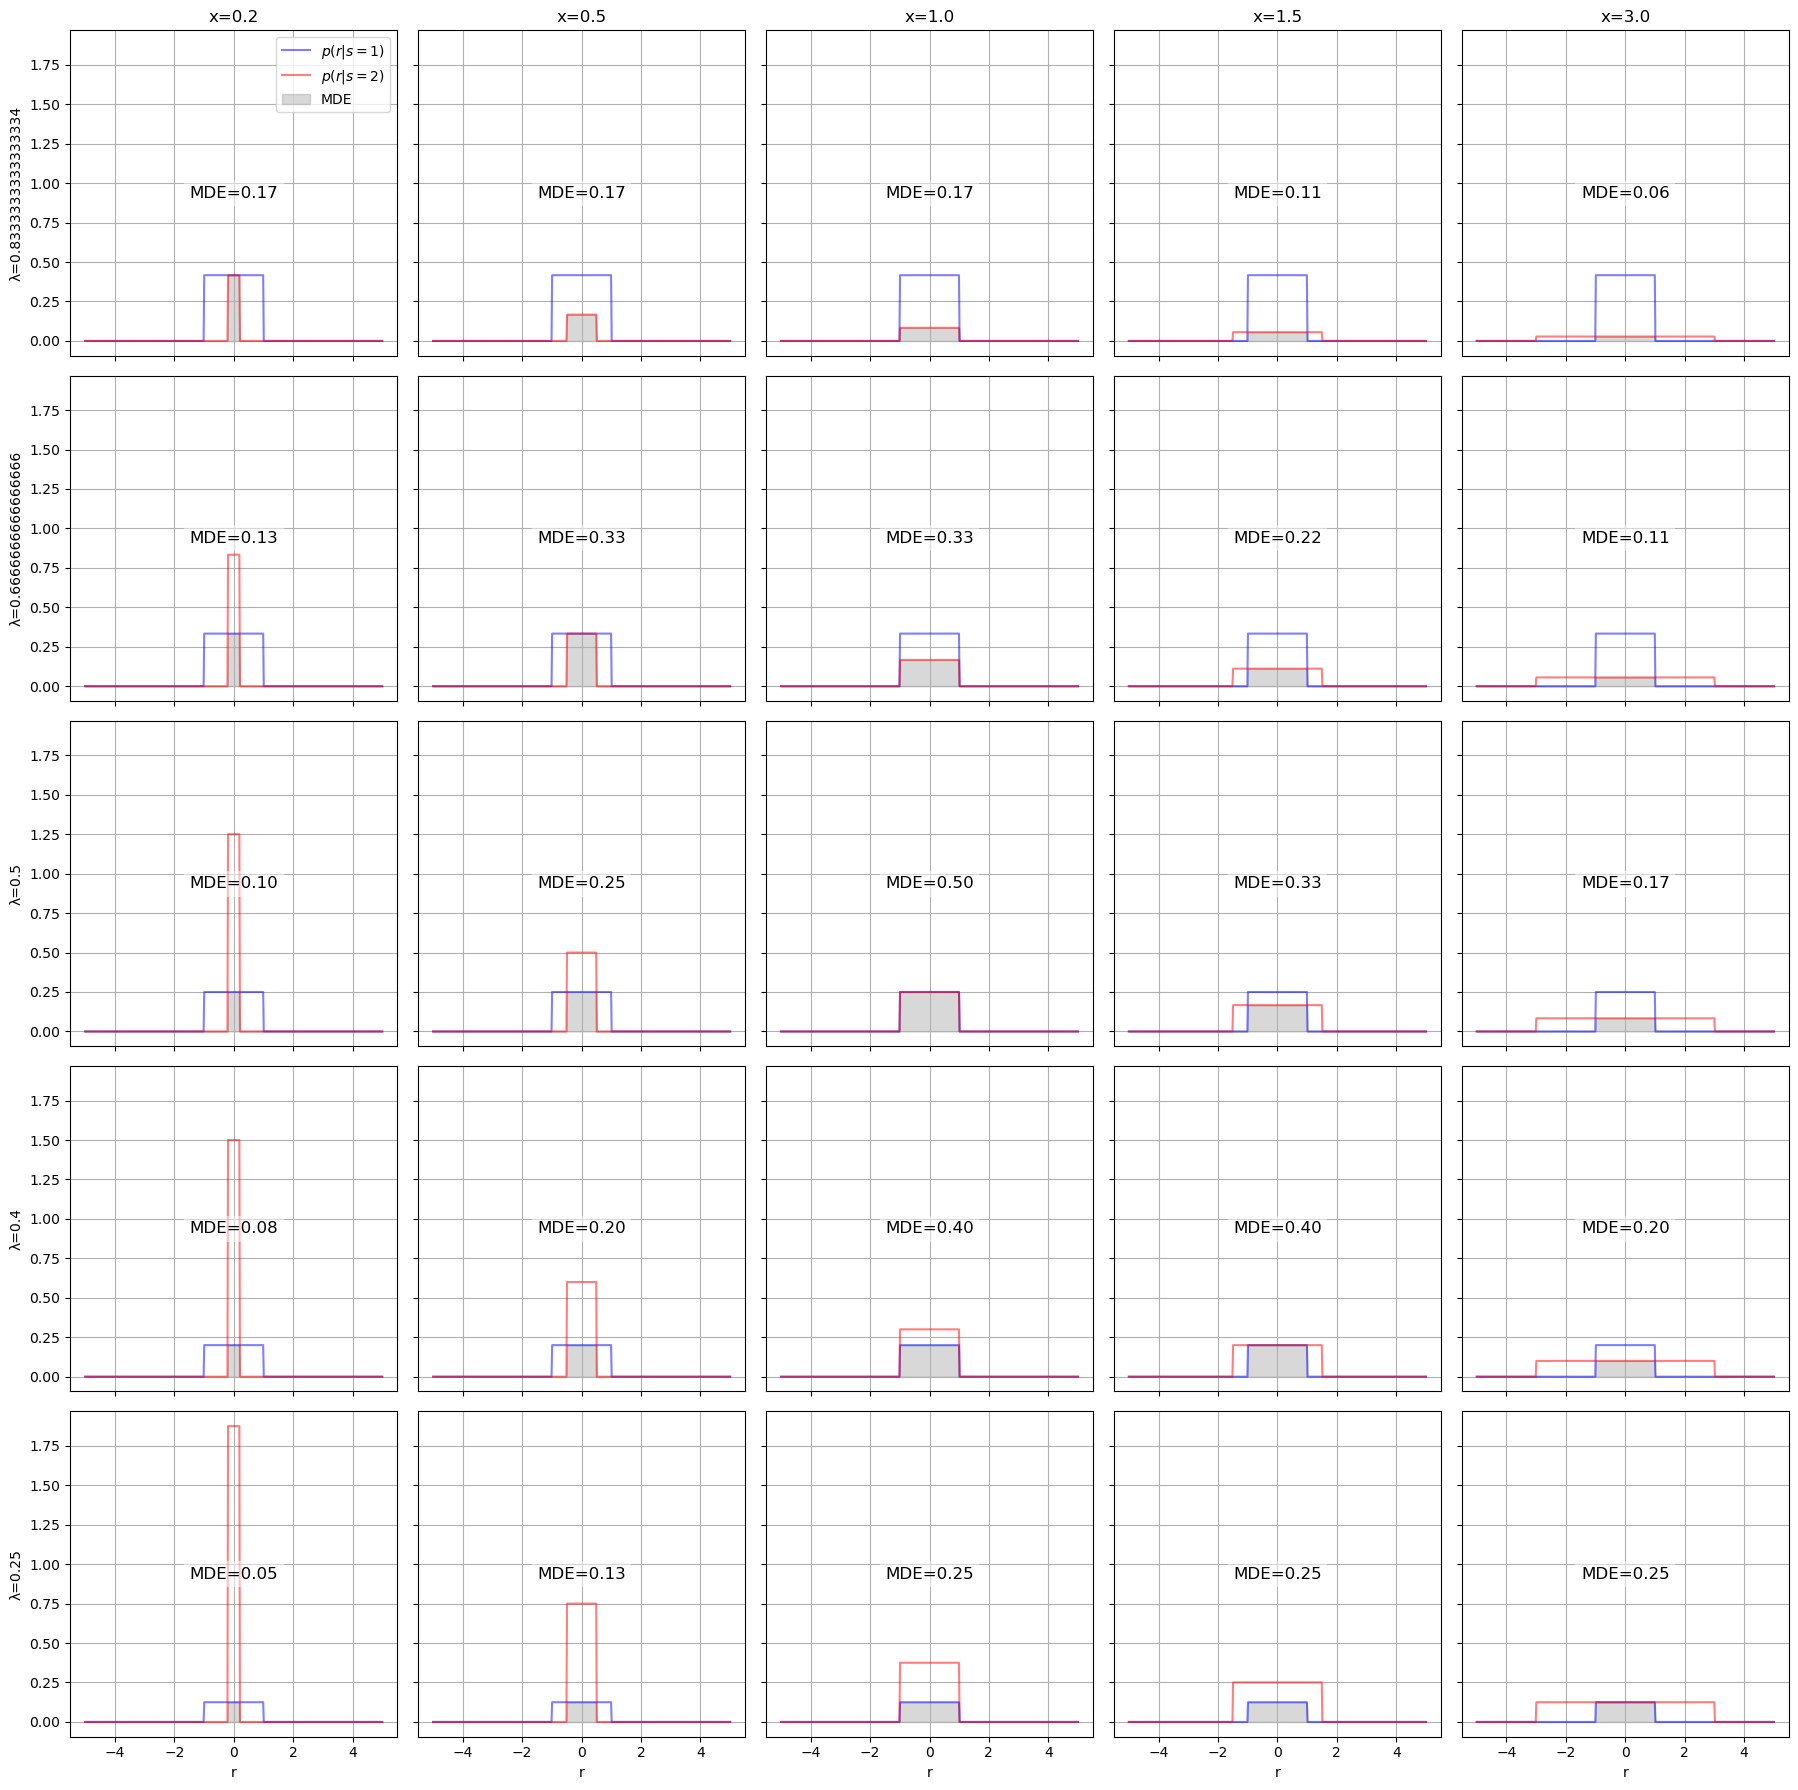

In [19]:
x_values = np.array([0.2, 0.5, 1.0, 1.5, 3])

lambda_values = 1 / (x_values + 1)
# lambda_values = [0.1, 0.3, 0.5, 0.7, 0.9]
r_grid = np.linspace(-5, 5, 500)

fig, axes = plt.subplots(5, 5, figsize=(18, 18), sharex=True, sharey=True)

for i, lambda_ in enumerate(lambda_values):
    for j, x in enumerate(x_values):
        ax = axes[i, j]
        p_r_given_s1 = np.where((r_grid >= -1) & (r_grid <= 1), 0.5, 0)
        p_r_given_s2 = np.where((r_grid >= -x) & (r_grid <= x), 1 / (2 * x), 0)
        ax.plot(
            r_grid, lambda_ * p_r_given_s1, label="$p(r|s=1)$", color="blue", alpha=0.5
        )
        ax.plot(
            r_grid,
            (1 - lambda_) * p_r_given_s2,
            label="$p(r|s=2)$",
            color="red",
            alpha=0.5,
        )
        if i == 0:
            ax.set_title(f"x={x}")
        if j == 0:
            ax.set_ylabel(f"λ={lambda_}")
        ax.grid(True)
        if i == 4:
            ax.set_xlabel("r")
        # Shade the minimal discrimination error region
        min_curve = np.minimum(lambda_ * p_r_given_s1, (1 - lambda_) * p_r_given_s2)
        ax.fill_between(r_grid, 0, min_curve, color="gray", alpha=0.3, label="MDE")
        # write the value of the minimum discrimination error, its the integral of the shaded area
        min_error = np.trapezoid(min_curve, r_grid)
        ax.text(
            0.5,
            0.5,
            f"MDE={min_error:.2f}",
            ha="center",
            va="center",
            transform=ax.transAxes,
            fontsize=12,
            bbox=dict(facecolor="white", alpha=0.5, edgecolor="none"),
        )

# Only add legend to the first subplot
axes[0, 0].legend()
plt.tight_layout()
plt.show()

|                | $\lambda > \frac{1}{1+x}$ | $\lambda \leq \frac{1}{1+x}$ |
|----------------|:------------------------:|:----------------------------:|
| $x > 1$        | $\hat{s}_{MAP}(r) = \begin{cases} s_1 & r \in [-1, 1] \\ s_2 & \text{otherwise} \end{cases}$ |            $\hat{s}_{MAP}(r) = s_2$ |
| $x \leq 1$     | $\hat{s}_{MAP}(r) = \begin{cases} s_1 & r \in [-1, 1] \\ s_2 & \text{otherwise} \end{cases}$ | $\hat{s}_{MAP}(r) = \begin{cases} s_2 & r \in [-x, x]\\ s_1 & r \in [-1, 1]\setminus [-x, x] \\ s_2 & \text{otherwise} \end{cases}$ |

**(b)** Compute the MDE for each case analytically. *(1 point)*

To compute the Minimum Discrimination Error (MDE) analytically for each case, use the MAP estimator boundaries from (a) to determine the integration regions. The MDE is the total probability of making an error, i.e., integrating the minimum of the two posterior-weighted likelihoods over all $r$:

$$
\text{MDE} = \int \min\left(\lambda\, p(r|s_1),\ (1-\lambda)\, p(r|s_2)\right) dr
$$

**Case 1: $x > 1$, $\lambda > \frac{1}{1+x}$**

- $p(r|s_1)$ is nonzero only on $[-1,1]$, $p(r|s_2)$ on $[-x,x]$.
- Since $\lambda > \frac{1}{1+x}$, $\lambda \frac{1}{2} > (1-\lambda)\frac{1}{2x}$, so the minimum is always $(1-\lambda)\frac{1}{2x}$ in $[-1,1]$.

$$
\text{MDE} = \int_{-1}^1 (1-\lambda)\frac{1}{2x} dr = (1-\lambda)\frac{1}{2x} \cdot 2 = \frac{1-\lambda}{x}
$$


**Case 2: $x > 1$, $\lambda \leq \frac{1}{1+x}$**

- Now $(1-\lambda)\frac{1}{2x} \geq \lambda \frac{1}{2}$, so the minimum is $\lambda \frac{1}{2}$ in $[-1,1]$.

$$
\text{MDE} = \int_{-1}^1 \lambda \frac{1}{2} dr = \lambda \frac{1}{2} \cdot 2 = \lambda
$$

**Case 3: $x \leq 1$, $\lambda > \frac{1}{1+x}$**

- The overlap region is $[-x, x]$. In this region, $\lambda \frac{1}{2} > (1-\lambda)\frac{1}{2x}$, so the minimum is $(1-\lambda)\frac{1}{2x}$.
- Outside $[-x, x]$ but inside $[-1, 1]$, only $p(r|s_2)$ is nonzero, so the minimum is zero.
- Outside $[-1, 1]$, only $p(r|s_2)$ is nonzero, so the minimum is zero.

$$
\text{MDE} = \int_{-x}^{x} (1-\lambda)\frac{1}{2x} dr = (1-\lambda)\frac{1}{2x} \cdot 2x = 1-\lambda
$$  

**Case 4: $x \leq 1$, $\lambda \leq \frac{1}{1+x}$**

- In the overlap region $[-x, x]$, the minimum is $(\lambda \frac{1}{2})$.
- Outside $[-x, x]$ the minimum is 0.

$$
\text{MDE} = \int_{-x}^{x} \lambda \frac{1}{2} dr = \lambda \frac{1}{2} \cdot 2x = \lambda x
$$


|                | $\lambda > \frac{1}{1+x}$ | $\lambda \leq \frac{1}{1+x}$ |
|----------------|:------------------------:|:----------------------------:|
| $x > 1$        | $\text{MDE} = \dfrac{1-\lambda}{x}$ | $\text{MDE} = \lambda$ |
| $x \leq 1$     | $\text{MDE} = 1-\lambda$ | $\text{MDE} = \lambda x$ |

**(c)** Confirm your results by simulation for multiple sets of parameters $\lambda$ and $x$.
Choose your selection of parameters such that they cover all cases from (a). *(2 points)*
1. Generate stimuli (sufficient amount)
2. Generate responses
3. Apply estimator (write a function of $\hat{s}_{MAP}(r)$ from (a))
4. Compute MDE
5. Compare to analytical MDE